# Clustering

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

In [2]:
blob_center = np.array(
    [[0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [3]:
X, y = make_blobs(n_samples=2000, centers=blob_center,
                  cluster_std=blob_std, random_state=7)

In [4]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

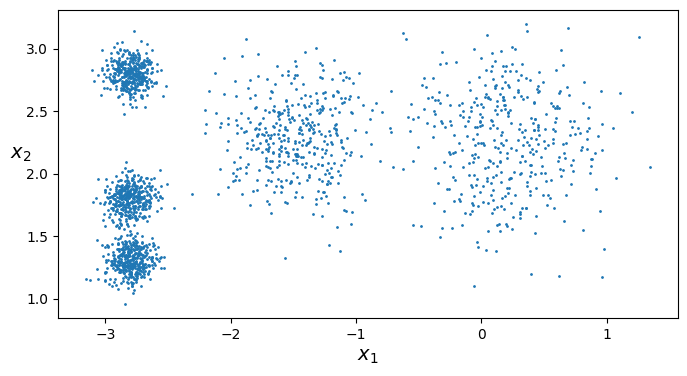

In [5]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

# K-means

In [6]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)

y_pred = kmeans.fit_predict(X)

In [7]:
y_pred

array([0, 0, 1, ..., 3, 4, 0], dtype=int32)

A saída em y_pred corresponde a qual cluster aquela instância pertence.

centróides:

In [8]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.31332823,  1.96822352],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.08703534,  2.58438091]])

Aplicando novas instâncias:

In [9]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

In [10]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


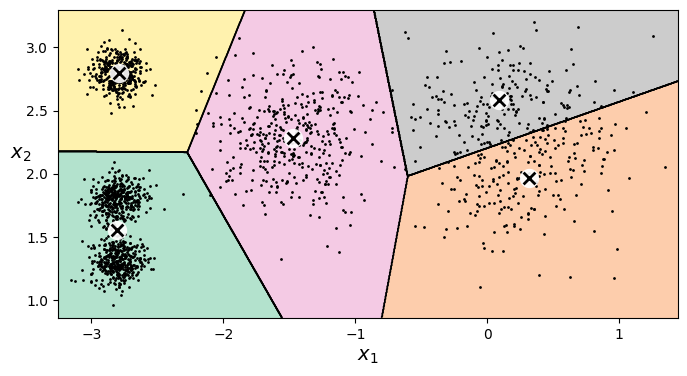

In [11]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Os X's representam os centróides de cada cluster.

In [12]:
kmeans.transform(X_new)

array([[2.83778629, 0.31493543, 1.4955481 , 2.9042344 , 0.59082671],
       [5.81943941, 2.68685968, 4.47759126, 5.84739223, 2.9710039 ],
       [1.4618254 , 3.47026031, 1.6912185 , 0.29040966, 3.11488787],
       [0.96879317, 3.35573094, 1.54672634, 0.36159148, 3.08818836]])

.transform() no kmeans mede a distância das intâncias para cada cluster.

**Métodos de inicialização dos centróides**

Caso sejam conhecidas as coordenadas aproximadas de onde os centróides devem estar, então podemos definir o hiperparâmetro **init**

In [13]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

kmeans_init = KMeans(n_clusters=5, init=good_init, n_init=1)

In [14]:
kmeans.inertia_

219.42800073647592

In [15]:
kmeans.score(X)

-219.4280007364759

O score retorna a inércia menor, pois ele respeita a regra do Scikit-Learn, quanto maior, melhor. Sendo assim, para que a menor inércia seja a maior no score, elas ficam negativas. 

**Mini-Batch K-Means**

In [16]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

**Escolha do número ótimo de clusters**

In [17]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6353422668284152

Usando o silhouette_score(), podemos decidir qual o número ótimo de clusters que podemos usar, quanto maior for seu resultado, melhor as intâncias estão divididas entre seus clusters.

Outra forma de escolher o número de clusters, é plotando os coeficientes de silhueta, com ele é possível observar quais clusters são bons, e as suas distribuições de instâncias.